# Fraud Data: Exploratory Data Analysis

**Table of contents:**
* Importing and cleaning up data
* Transation types
* Fraud Analysis
  * Amount in fraud transactions
  * Fraudlent accounts
  * Flagged as fraud
* High-Frequency Accounts
* Temporal Analysis

## Importing and cleaning up data

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df_fraud = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df_fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [52]:
df_fraud.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

It looks like there is not need for a lot of clean up. Let us just rename the oldbalanceOrg column to match the naming of the others

In [53]:
df_fraud = df_fraud.rename(columns = {'oldbalanceOrg':'oldbalanceOrig'})

In [54]:
df_fraud.head(10)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [55]:
df_fraud.tail(10)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


# Transation types

This section will focus on analyzing the different types of transactions. How many of each type of transations are there, and how many of them are fraud.

**Hypothesis:** Fraud transactions are more likely to appear in some transaction types than others.

**Hypothesis:** Fraud transactions are more likely to appear in the most used transaction type.

In [56]:
df_fraud_counts = df_fraud.groupby('type')['isFraud'].sum().reset_index()
df_fraud_counts.columns = ['type', 'fraud_count']

df_total_counts = df_fraud['type'].value_counts().reset_index()
df_total_counts.columns = ['type', 'total_count']

df_combined = pd.merge(df_total_counts, df_fraud_counts, on='type').set_index('type')
df_combined

,total_count,fraud_count
type,,
CASH_OUT,2237500,4116
PAYMENT,2151495,0
CASH_IN,1399284,0
TRANSFER,532909,4097
DEBIT,41432,0


<Axes: ylabel='type'>

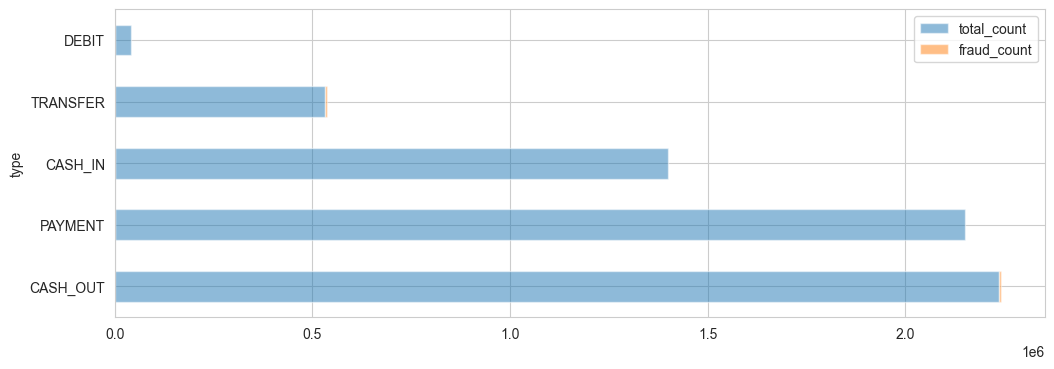

In [57]:
df_combined.plot(kind='barh', stacked=True, alpha=0.5, figsize=(12,4))

This analysis shows that fraud only appears in CASH_OUT and TRANSFER transaction types. Though the the bar plot shows that most transactions of these types are still non-fraudlent transactions.

The analysis does show that the most used transaction type is more likely to have fraudlent transactions than the second and third most used transaction, but there are also found many fraudlent transactions in the fourth most used type.

# Fraud Analysis

Analysis of only the transations marked as fraud.

In [58]:
# Make dataframe only with data marked as Fraud
df_isfraud = df_fraud[df_fraud['isFraud'] == 1].sort_index().reset_index()
df_isfraud

,index,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
1,3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
2,251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
3,252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
4,680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8208,6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
8209,6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
8210,6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
8211,6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


**Hypothesis:** 10% of all transactions are fraud

In [59]:
len(df_isfraud)

8213

In [60]:
len(df_fraud)

6362620

In [61]:
(len(df_isfraud)/len(df_fraud))*100

0.12908204481801522

0.12% of transactions are fraud.

## Amount in fraud transactions

Next the amount of money transfered through fraudlent transactions will be analysied.

**Hypothesis:** Fraudlent transactions mostly transfer larger amounts of money.

<Axes: xlabel='type', ylabel='amount'>

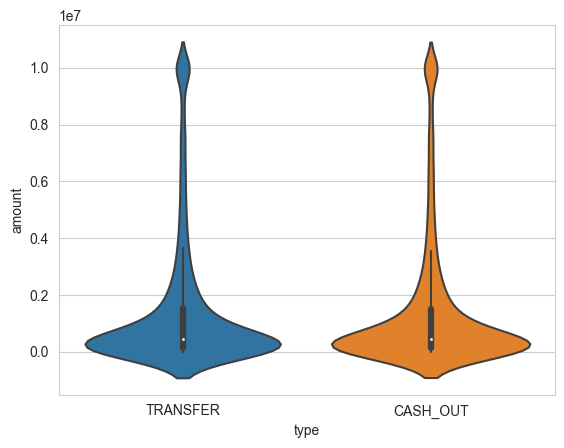

In [62]:
sns.violinplot(x='type', y='amount', data=df_isfraud)

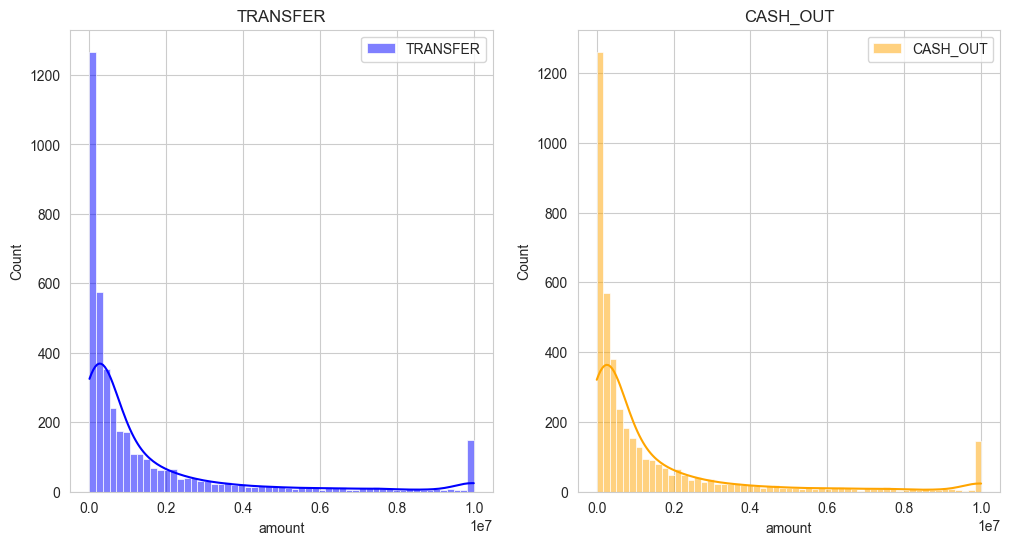

In [63]:
categories = df_isfraud['type'].unique()
fig, axes = plt.subplots(nrows=1, ncols=len(categories), figsize=(12, 6))
colors = ['blue', 'orange']

for ax, category, color in zip(axes, categories, colors):
    sns.histplot(df_isfraud[df_isfraud['type'] == category]['amount'], kde=True, label=category, ax=ax, color=color)
    ax.legend()
    ax.set_title(category)

plt.show()

This analysis suggets that most fraudlent transactions transfer a smaller amount of money. The graphs also shows that there are a small amount of very large fraudlent transactions.

## Flagged as fraud

The fraud data also shows a table named "flagged as fraud" which shows wheter a transaction has been marked as fraud.

**Hypothesis:** Only fraudlent transactions will be flagged as fraud

In [87]:
pd.DataFrame({
    'Description': ['Fraud', 'Flagged as Fraud', 'Both Fraud and Flagged as Fraud'],
    'Count': [df_fraud[df_fraud['isFraud'] == 1].shape[0], 
              df_fraud[df_fraud['isFlaggedFraud'] == 1].shape[0], 
              df_fraud[(df_fraud['isFraud'] == 1) & (df_fraud['isFlaggedFraud'] == 1)].shape[0]]
})

,Description,Count
0,Fraud,8213
1,Flagged as Fraud,16
2,Both Fraud and Flagged as Fraud,16


There is an equal amount of cells that are flagged as fraud and is both fraud and flagged as fraud. This shows that no non-fraudlent transactions were flagged incorrectly as fraud. The table also shows that there are many fraud transactions that were not flagged as fraud.

**Hypothesis:** Only a certain kind of transactions is marked as fraud

In [65]:
# Make dataframe only with data flagged as Fraud
df_isflagged = df_fraud[df_fraud['isFlaggedFraud'] == 1].sort_index().reset_index()
df_isflagged

,index,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
1,3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
2,3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
3,5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
4,5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5,5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6,6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
7,6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
8,6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
9,6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


Only transactions of the type TRANSFER and of large amounts of money, has been flagged as fraud.

# High-Frequency Accounts

**Hypothesis:** High-Frequency Accounts will be involved in fraud transactions

In [66]:
#Number of accounts to check:
n = 10

# Finding top nameOrig accounts
top_nameOrig = df_fraud['nameOrig'].value_counts().head(n)
# Finding top nameDest accounts
top_nameDest = df_fraud['nameDest'].value_counts().head(n)

i = 0
while i < len(top_nameOrig):
    fraud_nameOrig = df_fraud[(df_fraud['nameOrig'] == top_nameOrig.index[i]) & (df_fraud['isFraud'] == 1)].shape[0]
    print(f"Top {i+1} nameOrig account: {top_nameOrig.index[i]} with {top_nameOrig.values[i]} transactions. Involved in fraudulent transactions: {'Yes' if fraud_nameOrig > 0 else 'No'}")
    i = i+1

print('')

j = 0
while j < len(top_nameDest):
    fraud_nameDest = df_fraud[(df_fraud['nameDest'] == top_nameDest.index[j]) & (df_fraud['isFraud'] == 1)].shape[0]
    print(f"Top {j+1} nameDest account: {top_nameDest.index[j]} with {top_nameDest.values[j]} transactions. Involved in fraudulent transactions: {'Yes' if fraud_nameDest > 0 else 'No'}")
    j = j+1

Top 1 nameOrig account: C1902386530 with 3 transactions. Involved in fraudulent transactions: No
Top 2 nameOrig account: C363736674 with 3 transactions. Involved in fraudulent transactions: No
Top 3 nameOrig account: C545315117 with 3 transactions. Involved in fraudulent transactions: No
Top 4 nameOrig account: C724452879 with 3 transactions. Involved in fraudulent transactions: No
Top 5 nameOrig account: C1784010646 with 3 transactions. Involved in fraudulent transactions: No
Top 6 nameOrig account: C1677795071 with 3 transactions. Involved in fraudulent transactions: No
Top 7 nameOrig account: C1462946854 with 3 transactions. Involved in fraudulent transactions: No
Top 8 nameOrig account: C1999539787 with 3 transactions. Involved in fraudulent transactions: No
Top 9 nameOrig account: C2098525306 with 3 transactions. Involved in fraudulent transactions: No
Top 10 nameOrig account: C400299098 with 3 transactions. Involved in fraudulent transactions: No

Top 1 nameDest account: C1286084

This data shows no correlation between high frequency accounts and fraudlent transactions. This may be because the nameDest accounts with high frequencies could be money sent to stores and shops.

**Hypothesis:** Fraudlent accounts are only involved in fraud

For this analysis it will be assumed the destination account in the fraudlent transactions is the fraudlent account. This is deemed safe to assume since the goal of fraud is to obtain money not to give it away.

In [67]:
# Identify accounts involved in fraudulent transactions
fraudulent_dest_accounts = set(df_fraud[df_fraud['isFraud'] == 1]['nameDest']) #using set only allows for unique objects to be stored

# Check if these accounts are also involved in non-fraudulent transactions
legit_orig_with_fraudulent_accounts = df_fraud[(df_fraud['isFraud'] == 0) & (df_fraud['nameOrig'].isin(fraudulent_dest_accounts))]
legit_dest_with_fraudulent_accounts = df_fraud[(df_fraud['isFraud'] == 0) & (df_fraud['nameDest'].isin(fraudulent_dest_accounts))]

# Create a summary table
summary_df = pd.DataFrame({
    'Description': ['Fraudulent nameDest', 
                    'Legitimate transactions with fraudulent nameOrig', 
                    'Legitimate transactions with fraudulent nameDest'],
    'Count': [len(fraudulent_dest_accounts), 
              len(legit_orig_with_fraudulent_accounts['nameOrig'].unique()), 
              len(legit_dest_with_fraudulent_accounts['nameDest'].unique())]
})
summary_df

,Description,Count
0,Fraudulent nameDest,8169
1,Legitimate transactions with fraudulent nameOrig,18
2,Legitimate transactions with fraudulent nameDest,5492


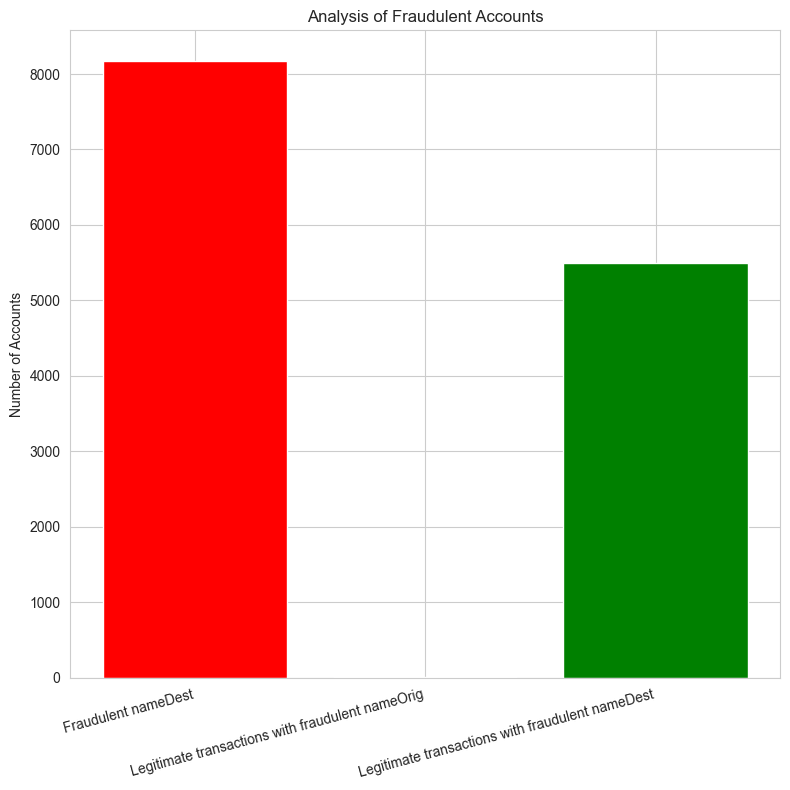

In [68]:
plt.figure(figsize=(8,8))
plt.bar(summary_df['Description'], summary_df['Count'], color=['red', 'blue', 'green'])
plt.xticks(rotation=15, ha='right')
plt.ylabel('Number of Accounts')
plt.title('Analysis of Fraudulent Accounts')
plt.tight_layout()
plt.show()

These numbers show that fraudlent accounts are also involved in non-fraudlent transactions. Very few of the where they send money, but a good amount where they recieve money. If one were to assume that the accounts belonged to scammers, this might indicate that the legimate transactions to these fraud accounts might also be fraud marked incorrectly. The other conclusion might be that the fraud accounts simply also take part in legimate transactions.

# Temporal Analysis

To analyse the change in transactions over time 3 plots will be created. The first representing the number of transactions over time, the second representing the average amount transfered, and the third representing the number of fraudlent transactions over time.

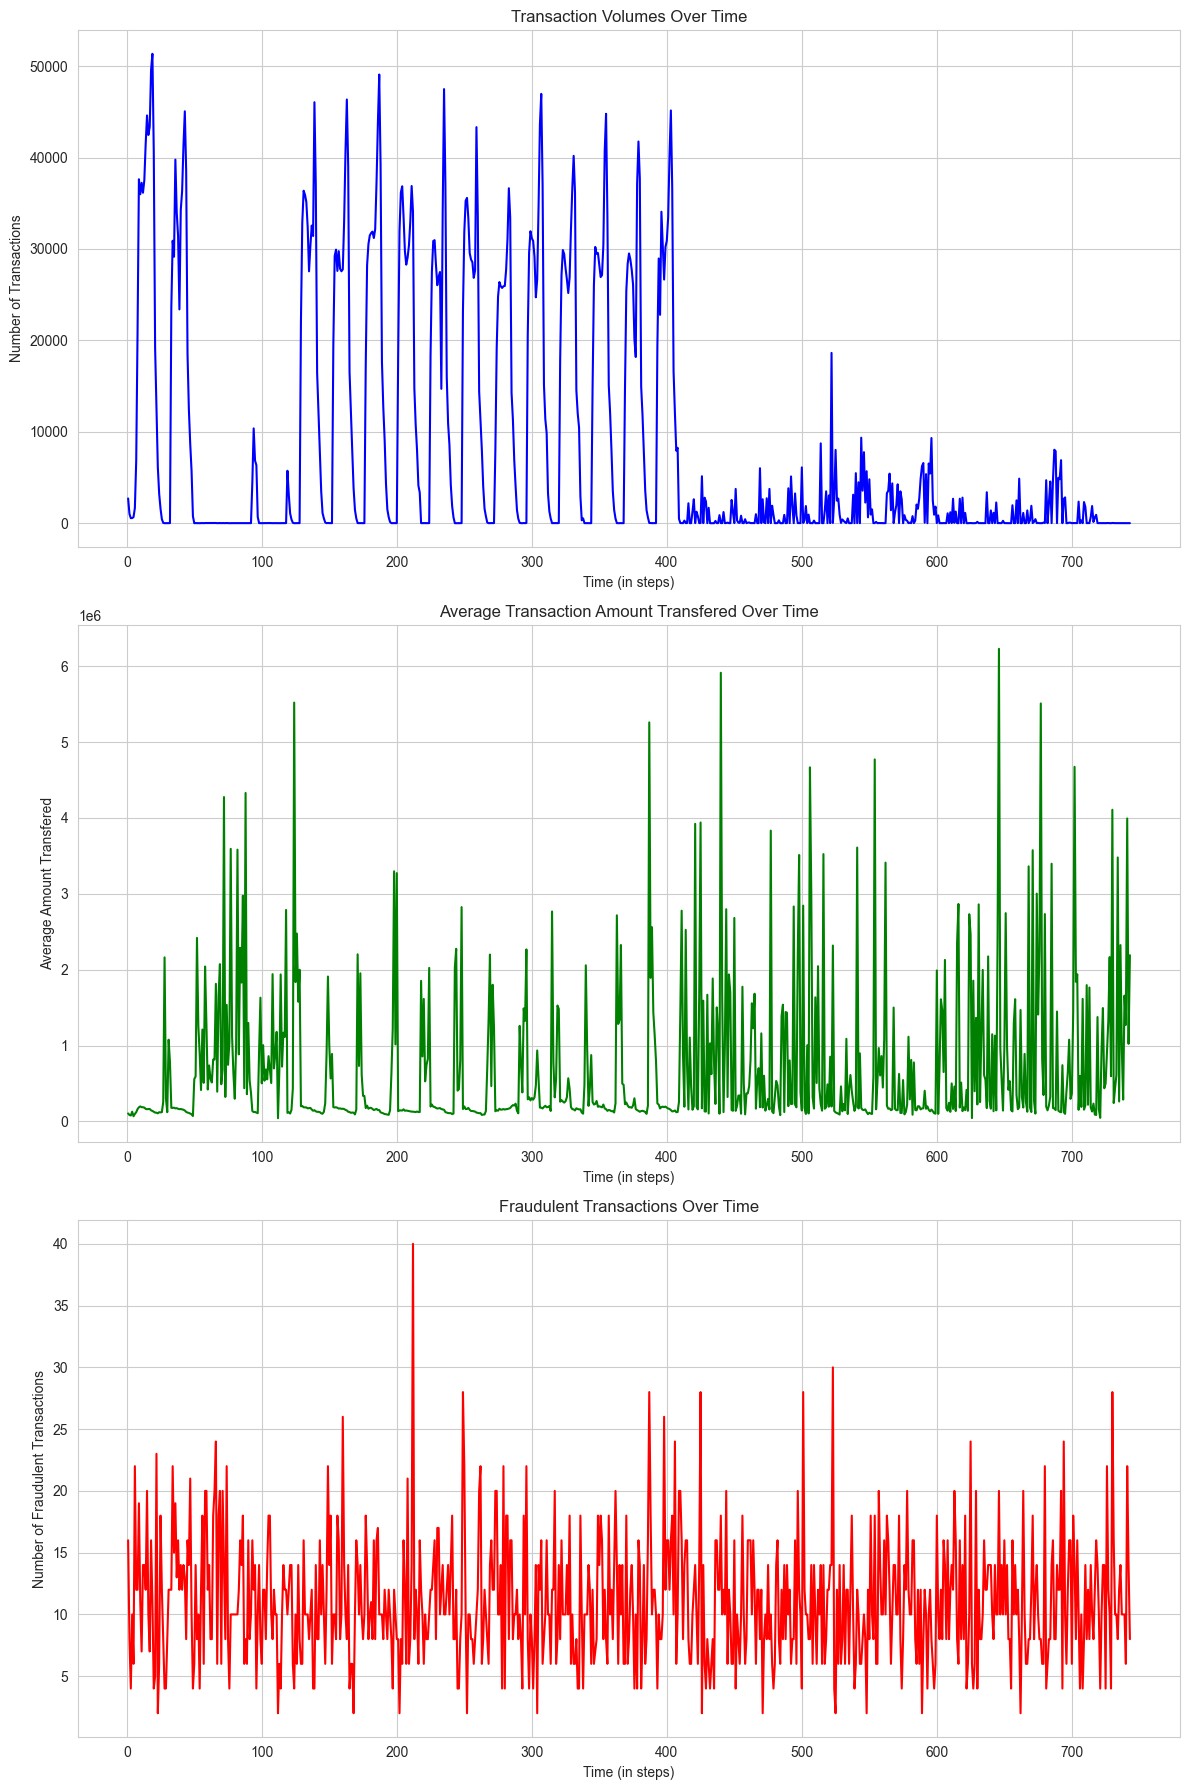

In [69]:
sns.set_style("whitegrid")

# Data preparation
transaction_volumes = df_fraud['step'].value_counts().sort_index()
average_amount = df_fraud.groupby('step')['amount'].mean()
fraud_transactions = df_fraud[df_fraud['isFraud'] == 1]
fraud_counts = fraud_transactions['step'].value_counts().sort_index()

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

sns.lineplot(ax=axes[0], x=transaction_volumes.index, y=transaction_volumes.values, color='blue')
axes[0].set_title('Transaction Volumes Over Time')
axes[0].set_xlabel('Time (in steps)')
axes[0].set_ylabel('Number of Transactions')

sns.lineplot(ax=axes[1], x=average_amount.index, y=average_amount.values, color='green')
axes[1].set_title('Average Transaction Amount Transfered Over Time')
axes[1].set_xlabel('Time (in steps)')
axes[1].set_ylabel('Average Amount Transfered')

sns.lineplot(ax=axes[2], x=fraud_counts.index, y=fraud_counts.values, color='red')
axes[2].set_title('Fraudulent Transactions Over Time')
axes[2].set_xlabel('Time (in steps)')
axes[2].set_ylabel('Number of Fraudulent Transactions')

plt.tight_layout()
plt.show()

There seems to be a higher number of transactions around 100 to 400, but when this is compared to the average amount transferred the amount seems to be higher when there is not the most amount of transactions. It seems that from 100 to 400 a larger amount of smaller transactions were made. And from 400 to 700 a smaller amount of larger transactions were completed.
The number of fraudulent transactions does not seem to change much over time. There is one larger spike right after the 200 mark but other than that the amount of fraudulent transactions is pretty steady.

# KNN

In [71]:
df_knn = df_fraud.copy()

In [72]:
df_knn.rename(columns = {'oldbalanceOrg':'oldbalanceOrig'}, inplace=True)
df_renamed = df_knn[['type','amount','oldbalanceOrig', 'oldbalanceDest','newbalanceDest','isFraud']].copy()

In [73]:
def type_replace(value):
    if value == 'CASH_IN':
        new_value = 0
    elif value == 'CASH_OUT':
        new_value = 1
    elif value == 'PAYMENT':
        new_value = 2
    elif value == 'DEBIT':
        new_value = 3
    else:
        new_value = 4
    return new_value 

In [74]:
df_renamed['type']=df_renamed['type'].apply(type_replace)

In [75]:
df_renamed.head()

,type,amount,oldbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,2,9839.64,170136.0,0.0,0.0,0
1,2,1864.28,21249.0,0.0,0.0,0
2,4,181.00,181.0,0.0,0.0,1
3,1,181.00,181.0,21182.0,0.0,1
4,2,11668.14,41554.0,0.0,0.0,0


In [76]:
from sklearn.model_selection import train_test_split

_, df_small, _, _ = train_test_split(df_renamed, df_renamed['isFraud'], test_size = 0.1, random_state=0, stratify=df_renamed['isFraud'])
df_small

,type,amount,oldbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
3719254,2,6160.39,0.00,0.00,0.00,0
3279306,0,316320.65,3890701.15,618799.45,302478.79,0
1641602,1,166964.42,0.00,243536.23,410500.65,0
1845883,2,6043.35,125894.50,0.00,0.00,0
3125087,2,11022.05,42039.00,0.00,0.00,0
...,...,...,...,...,...,...
6301803,4,117050.17,0.00,1166125.57,1283175.74,0
2591148,1,127019.75,432455.34,774931.13,901950.88,0
2137751,1,81754.37,0.00,1033822.94,1115577.31,0
5203113,1,31114.67,0.00,14410672.37,14441787.04,0


In [77]:
df_X=df_small.drop(columns=['isFraud'])
df_y=df_small['isFraud']

In [78]:
df_X

,type,amount,oldbalanceOrig,oldbalanceDest,newbalanceDest
3719254,2,6160.39,0.00,0.00,0.00
3279306,0,316320.65,3890701.15,618799.45,302478.79
1641602,1,166964.42,0.00,243536.23,410500.65
1845883,2,6043.35,125894.50,0.00,0.00
3125087,2,11022.05,42039.00,0.00,0.00
...,...,...,...,...,...
6301803,4,117050.17,0.00,1166125.57,1283175.74
2591148,1,127019.75,432455.34,774931.13,901950.88
2137751,1,81754.37,0.00,1033822.94,1115577.31
5203113,1,31114.67,0.00,14410672.37,14441787.04


In [79]:
df_y

3719254    0
3279306    0
1641602    0
1845883    0
3125087    0
          ..
6301803    0
2591148    0
2137751    0
5203113    0
2273746    0
Name: isFraud, Length: 636262, dtype: int64

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=0, stratify=df_y)

In [81]:
y_train.value_counts()

isFraud
0    476580
1       616
Name: count, dtype: int64

In [82]:
y_test.value_counts()

isFraud
0    158861
1       205
Name: count, dtype: int64

In [83]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train) 

In [84]:
clf.score(X_train, y_train)

0.9994928708539049

In [85]:
clf.score(X_test, y_test)

0.9992393094690254

<function matplotlib.pyplot.show(close=None, block=None)>

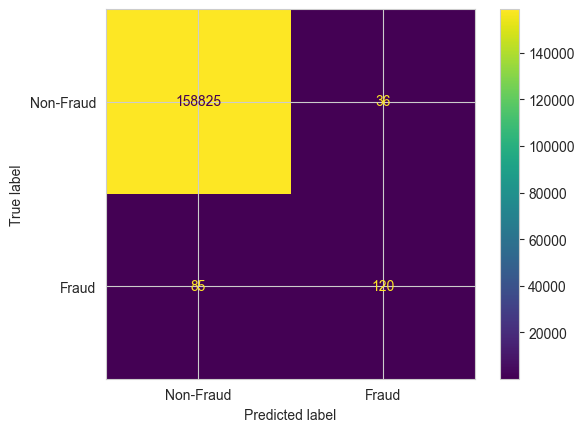

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Non-Fraud', 'Fraud'])
plt.show